<a href="https://colab.research.google.com/github/CodeHunterOfficial/DL_20241S/blob/main/bitcoin_price_prediction_using_lstm_and_XGBoot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitcoin Stock price Prediction using LSTM

![](https://media0.giphy.com/media/f67U9Xc53i4ViUs5T2/giphy.gif?cid=ecf05e47h4dpv8s5ppc6omcbb5uzwprey8y97x3fy8qk8dk8&rid=giphy.gif&ct=g)

<iframe width="1024" height="576" src="https://www.youtube.com/embed/p-QY7JNGD60" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# [](http://) Table of Content
<hr style='height:2px'>

## 1. What is LSTM?
## 2. Importing Library
## 3. Loading Dataset
## 4. EDA
## 5. Biulding Model
## 6. Prediction
## 7. Evaluation
## 8. Conclusion
<hr style='height:2px'>

# 1. What is LSTM ?

* ###  Long short-term memory is an artificial recurrent neural network architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can process not only single data points, but also entire sequences of data.

* ### Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more. LSTMs are a complex area of deep learning.

* ### LSTMs are often referred to as fancy RNNs. Vanilla RNNs do not have a cell state. They only have hidden states and those hidden states serve as the memory for RNNs. Meanwhile, LSTM has both cell states and a hidden states.

![image](https://blog.floydhub.com/content/images/2019/06/Slide19.JPG)

# 2. Importing Library

In [239]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# 3. Loading Dataset

#  [We can use this link to download bitcoin dataset from yahoo finance](https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD)

In [240]:
# Load our dataset
# Note it should be in same dir
maindf = pd.read_csv("/content/BTC-USD.csv")

In [241]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  3197
Total number of fields present in the dataset:  7


In [242]:
maindf.shape

(3197, 7)

In [243]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-14,292.033997,296.147003,286.638000,287.463989,287.463989,28727200
1,2015-07-15,288.045013,293.247986,285.367004,285.829010,285.829010,27486600
2,2015-07-16,286.041992,291.183014,275.239990,278.088989,278.088989,49482600
3,2015-07-17,278.091003,280.279999,272.042999,279.471985,279.471985,27591400
4,2015-07-18,279.330994,282.527008,274.075012,274.901001,274.901001,25187100


In [244]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3192,2024-04-09,71632.500000,71742.507813,68212.921875,69139.015625,69139.015625,36426900409
3193,2024-04-10,69140.242188,71093.429688,67503.562500,70587.882813,70587.882813,38318601774
3194,2024-04-11,70575.734375,71256.234375,69571.812500,70060.609375,70060.609375,30153382941
3195,2024-04-12,70061.382813,71222.742188,65254.835938,67195.867188,67195.867188,44129299406
3196,2024-04-13,67147.718750,67869.507813,65898.859375,67586.578125,67586.578125,46522564608


In [245]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3197 non-null   object 
 1   Open       3197 non-null   float64
 2   High       3197 non-null   float64
 3   Low        3197 non-null   float64
 4   Close      3197 non-null   float64
 5   Adj Close  3197 non-null   float64
 6   Volume     3197 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 175.0+ KB


In [246]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3.197000e+03
mean,17234.515073,17638.235947,16805.813669,17254.207426,17254.207426,1.867636e+10
std,17605.052417,18030.330417,17141.094999,17622.473481,17622.473481,1.940326e+10
min,210.067993,226.320999,199.567001,210.494995,210.494995,1.271260e+07
25%,3631.170166,3685.305664,3585.060059,3631.040039,3631.040039,1.976040e+09
50%,9471.213867,9655.073242,9263.069336,9477.641602,9477.641602,1.530460e+10
75%,28087.175781,28532.830078,27563.876953,28168.089844,28168.089844,2.924455e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11


Визуализация датасеть


<Axes: title={'center': 'Bitcoin Closing Price'}, xlabel='Date'>

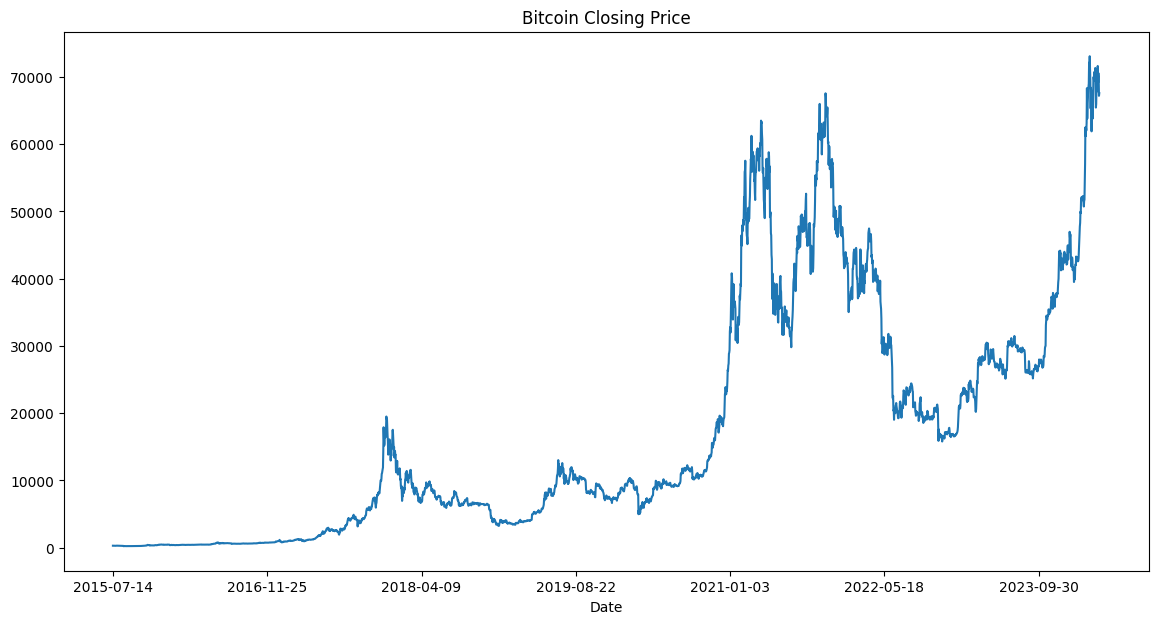

In [247]:
maindf.set_index("Date")['Adj Close'].plot(figsize=(14,7), title="Bitcoin Closing Price")

# Checking for Null Values

In [248]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [249]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [250]:
# If dataset had null values we can use this code to drop all the null values present in the dataset

# maindf=maindf.dropna()
# print('Null Values:',maindf.isnull().values.sum())
# print('NA values:',maindf.isnull().values.any())

In [251]:
# Final shape of the dataset after dealing with null values

maindf.shape

(3197, 7)

In [252]:
#calculating missing values in the dataset

missing_values = maindf.isnull().sum()
missing_per = (missing_values/maindf.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True)
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
Date,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Adj Close,0,0.0
Volume,0,0.0


In [253]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3197 non-null   object 
 1   Open       3197 non-null   float64
 2   High       3197 non-null   float64
 3   Low        3197 non-null   float64
 4   Close      3197 non-null   float64
 5   Adj Close  3197 non-null   float64
 6   Volume     3197 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 175.0+ KB


In [254]:
def fill_missing(df):
    ### функция для заполнения отсутствующих значений с использованием интерполяции ###
    df['Low'] = df['Low'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Adj Close'] = df['Adj Close'].interpolate()
    df['Volume'] = df['Volume'].interpolate()

    print(df.head())
    print(df.isnull().sum())

In [255]:
fill_missing(maindf)

         Date        Open        High         Low       Close   Adj Close  \
0  2015-07-14  292.033997  296.147003  286.638000  287.463989  287.463989   
1  2015-07-15  288.045013  293.247986  285.367004  285.829010  285.829010   
2  2015-07-16  286.041992  291.183014  275.239990  278.088989  278.088989   
3  2015-07-17  278.091003  280.279999  272.042999  279.471985  279.471985   
4  2015-07-18  279.330994  282.527008  274.075012  274.901001  274.901001   

     Volume  
0  28727200  
1  27486600  
2  49482600  
3  27591400  
4  25187100  
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# 4. EDA(Exploratory Data Analysis)

In [256]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 2015-07-14
Ending Date 2024-04-13


#### StockPrice Analysis from Start

In [257]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2016 = maindf.loc[(maindf['Date'] >= '2016-01-01')
                     & (maindf['Date'] < '2016-12-31')]

y_2016.drop(y_2016[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
171,2016-01-01,430.721008,436.246002,427.515015,434.334015
172,2016-01-02,434.622009,436.062012,431.869995,433.437988
173,2016-01-03,433.578003,433.743011,424.705994,430.010986
174,2016-01-04,430.061005,434.516998,429.084015,433.091003
175,2016-01-05,433.069000,434.182007,429.675995,431.959991
...,...,...,...,...,...
531,2016-12-26,896.905029,913.184021,896.898010,907.609985
532,2016-12-27,908.354004,940.047974,904.255005,933.197998
533,2016-12-28,934.830994,975.921021,934.830994,975.921021
534,2016-12-29,975.125000,979.396973,954.502991,973.497009


In [258]:
monthvise= y_2016.groupby(y_2016['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,412.805902,410.844485
February,402.304692,404.408274
March,417.262033,416.525774
April,433.487433,434.339398
May,459.237547,461.954415
June,638.544834,642.869061
July,662.977779,661.356103
August,581.238966,579.585197
September,604.614034,605.848633


 Note that we only have few months in 2014 so the rest of the months are **NaN**

In [259]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

Note that we only have few months in 2014 so the rest of the months are not plotted since we do not have the data

In [260]:
y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2016.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

Note that we only have few months in 2014 so the rest of the months are not plotted since we do not have the data

In [261]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2016, x=y_2016.Date, y=[y_2016['Open'], y_2016['Close'],
                                          y_2016['High'], y_2016['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

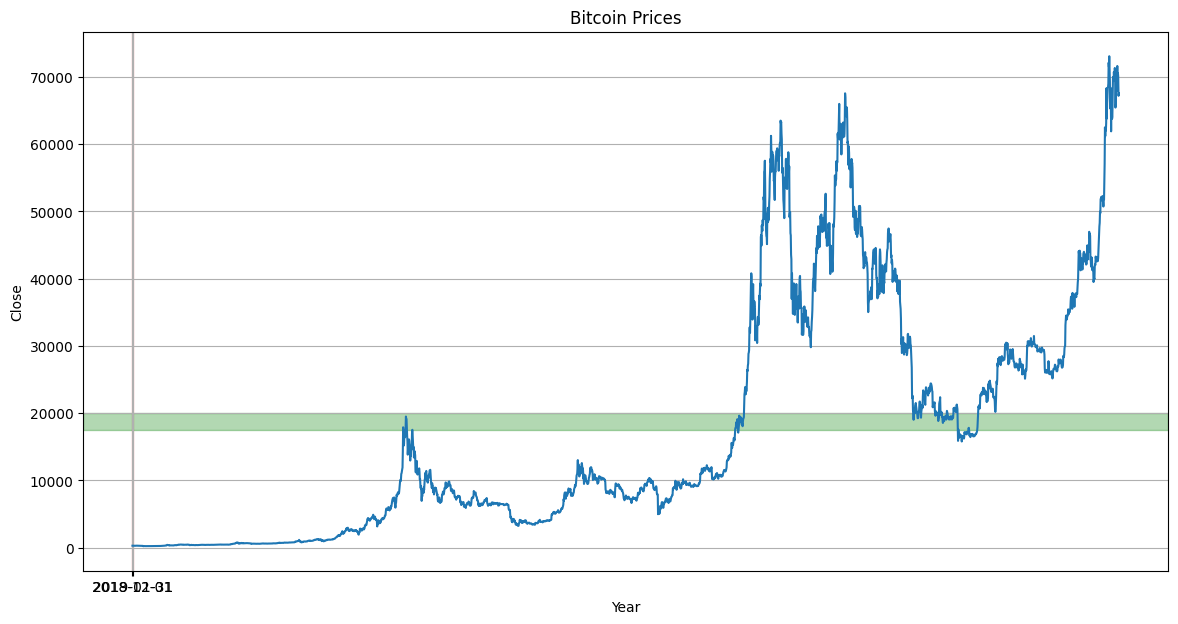

In [262]:
ax = maindf['Close'].plot(title='Bitcoin Prices', grid=True, figsize=(14,7))  # Замените 'Close' на нужный столбец
ax.set_xlabel('Year')
ax.set_ylabel('Close')  # Замените 'Close' на нужный столбец

ax.axvspan('2018-12-01', '2019-01-31', color='red', alpha=0.3)
ax.axhspan(17500, 20000, color='green', alpha=0.3)

#Zooming in

Text(0, 0.5, 'Close')

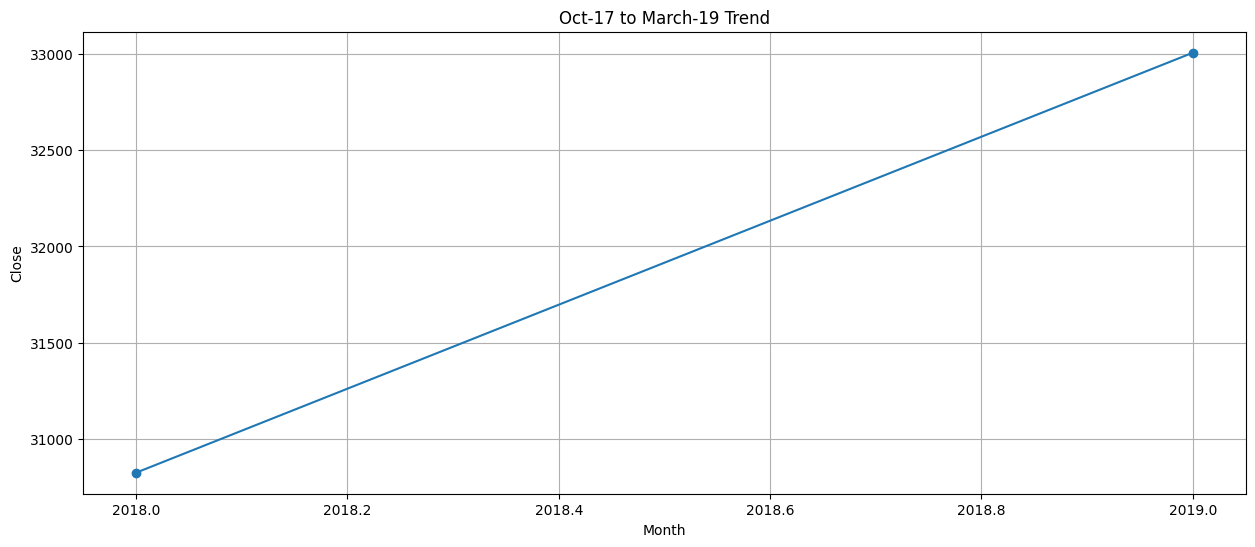

In [263]:
ax = maindf.loc['2017-10':'2019-03','Close'].plot(marker='o', linestyle='-',figsize=(15,6), title="Oct-17 to March-19 Trend", grid=True)  # Замените 'Close' на нужный столбец
ax.set_xlabel('Month')
ax.set_ylabel('Close')  # Замените 'Close' на нужный столбец

<ipython-input-264-308052d3eb45>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='Close', ylabel='Density'>

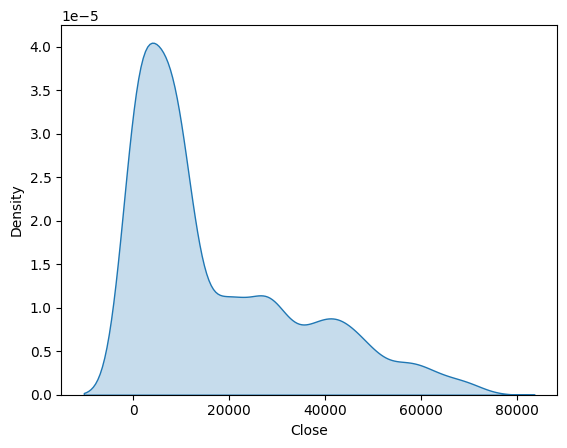

In [264]:
import seaborn as sns
sns.kdeplot(maindf['Close'], shade=True)

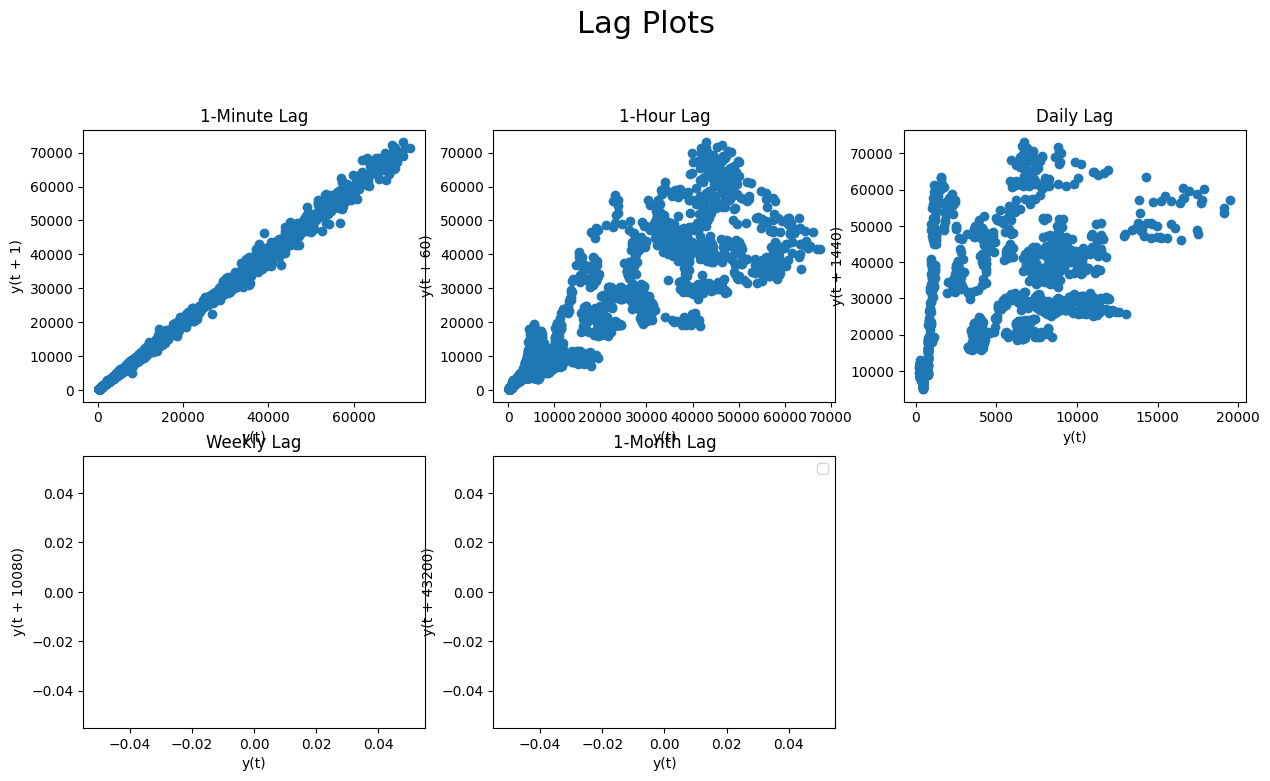

In [265]:
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(maindf['Close'], lag=1) #minute lag
plt.title('1-Minute Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(maindf['Close'], lag=60) #hourley lag
plt.title('1-Hour Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(maindf['Close'], lag=1440) #Daily lag
plt.title('Daily Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(maindf['Close'], lag=10080) #weekly lag
plt.title('Weekly Lag')

plt.subplot(3,3,5)
pd.plotting.lag_plot(maindf['Close'], lag=43200) #month lag
plt.title('1-Month Lag')

plt.legend()
plt.show()

In [266]:
maindf1=maindf.copy()

In [267]:
maindf1['Date'] = pd.to_datetime(maindf1['Date'])  # Преобразуем столбец 'Date' в формат даты, если он не был преобразован ранее
maindf1 = maindf.set_index('Date')  # Устанавливаем столбец 'Date' в качестве индекса
hourly_data = maindf1.resample('1H').mean()  # Выполняем ресемплирование по часу и вычисляем среднее
hourly_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-14 00:00:00,292.033997,296.147003,286.638,287.463989,287.463989,28727200.0
2015-07-14 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-14 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-14 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-14 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
BTC_Price_daily = maindf1.resample("24H").mean() #daily resampling

In [269]:
maindf1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3197 entries, 2015-07-14 to 2024-04-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3197 non-null   float64
 1   High       3197 non-null   float64
 2   Low        3197 non-null   float64
 3   Close      3197 non-null   float64
 4   Adj Close  3197 non-null   float64
 5   Volume     3197 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 174.8 KB


In [270]:
import plotly.express as px

fig = px.line(BTC_Price_daily, x=BTC_Price_daily.index, y='Close', title='Bitcoin Daily Close Prices with Range Slider and Selectors')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [271]:
BTC_Price_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3197 entries, 2015-07-14 to 2024-04-13
Freq: 24H
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3197 non-null   float64
 1   High       3197 non-null   float64
 2   Low        3197 non-null   float64
 3   Close      3197 non-null   float64
 4   Adj Close  3197 non-null   float64
 5   Volume     3197 non-null   float64
dtypes: float64(6)
memory usage: 174.8 KB


In [272]:
maindf.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-14,292.033997,296.147003,286.638000,287.463989,287.463989,28727200
1,2015-07-15,288.045013,293.247986,285.367004,285.829010,285.829010,27486600
2,2015-07-16,286.041992,291.183014,275.239990,278.088989,278.088989,49482600
3,2015-07-17,278.091003,280.279999,272.042999,279.471985,279.471985,27591400
4,2015-07-18,279.330994,282.527008,274.075012,274.901001,274.901001,25187100


In [273]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Candlestick(x=maindf.index,
                    open=maindf['Open'],
                    high=maindf['High'],
                    low=maindf['Low'],
                    close=maindf['Close']))
fig.show()

In [274]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [275]:
fill_missing(BTC_Price_daily)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-07-14  292.033997  296.147003  286.638000  287.463989  287.463989   
2015-07-15  288.045013  293.247986  285.367004  285.829010  285.829010   
2015-07-16  286.041992  291.183014  275.239990  278.088989  278.088989   
2015-07-17  278.091003  280.279999  272.042999  279.471985  279.471985   
2015-07-18  279.330994  282.527008  274.075012  274.901001  274.901001   

                Volume  
Date                    
2015-07-14  28727200.0  
2015-07-15  27486600.0  
2015-07-16  49482600.0  
2015-07-17  27591400.0  
2015-07-18  25187100.0  
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [276]:
BTC_Price_daily.Close

Date
2015-07-14      287.463989
2015-07-15      285.829010
2015-07-16      278.088989
2015-07-17      279.471985
2015-07-18      274.901001
                  ...     
2024-04-09    69139.015625
2024-04-10    70587.882813
2024-04-11    70060.609375
2024-04-12    67195.867188
2024-04-13    67586.578125
Freq: 24H, Name: Close, Length: 3197, dtype: float64

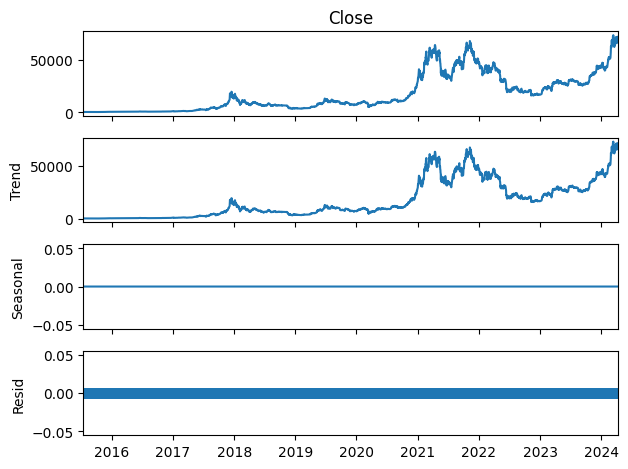

<Figure size 1500x1200 with 0 Axes>

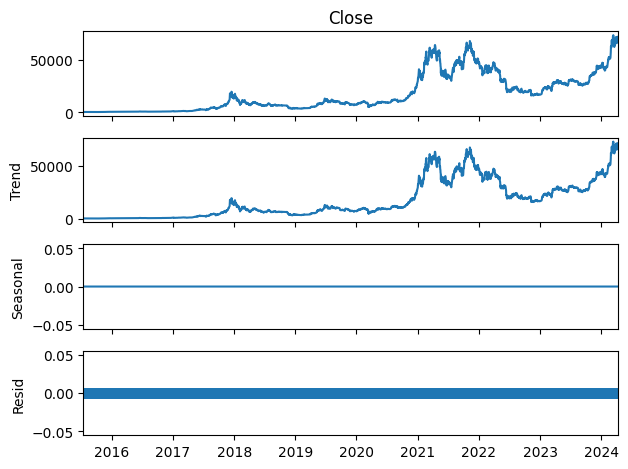

In [277]:
plt.figure(figsize=(15,12))
series = BTC_Price_daily.Close
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

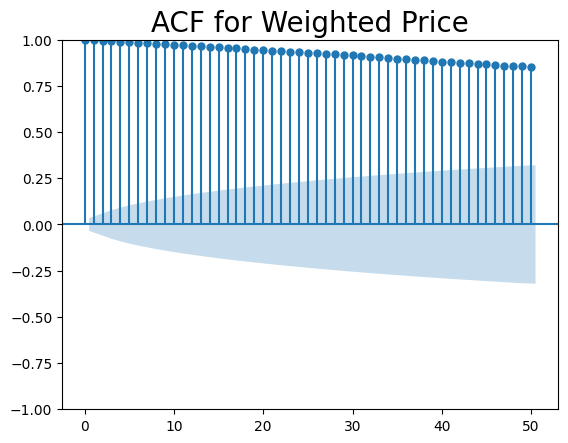

In [278]:
acf = plot_acf(series, lags=50, alpha=0.05)
plt.title("ACF for Weighted Price", size=20)
plt.show()

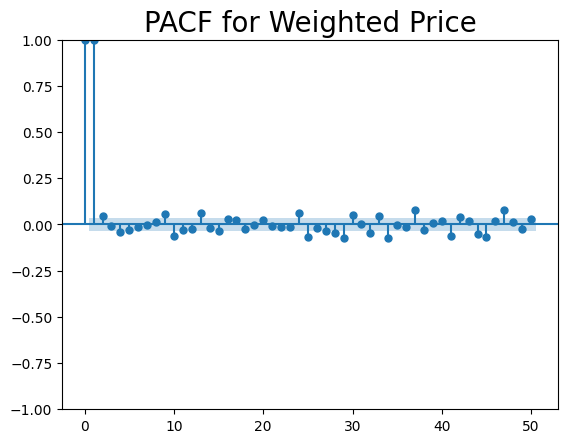

In [279]:
plot_pacf(series, lags=50, alpha=0.05, method='ols')
plt.title("PACF for Weighted Price", size=20)
plt.show()

In [280]:
stats, p, lags, critical_values = kpss(series, 'ct')

<ipython-input-280-5d53772d20e5>:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [281]:
print(f'Test Statistics : {stats}')
print(f'p-value : {p}')
print(f'Critical Values : {critical_values}')

if p < 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics : 0.3512415827029773
p-value : 0.01
Critical Values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


In [282]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    print("dftest: ", dftest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value

    print (dfoutput)

    if p > 0.05:
        print('Series is not Stationary')
    else:
        print('Series is Stationary')

In [283]:
adf_test(series)

Results of Dickey-Fuller Test:
dftest:  (-0.6393786099569074, 0.8618335511367365, 29, 3167, {'1%': -3.4324165008537446, '5%': -2.862453053648239, '10%': -2.567256039456668}, 51839.413725387065)
Test Statistic                   -0.639379
p-value                           0.861834
#Lags Used                       29.000000
Number of Observations Used    3167.000000
Critical Value (1%)              -3.432417
Critical Value (5%)              -2.862453
Critical Value (10%)             -2.567256
dtype: float64
Series is Stationary


In [284]:
df = BTC_Price_daily  # Нет необходимости в установке индекса заново, так как BTC_Price_daily уже имеет индекс DatetimeIndex

In [285]:
df.reset_index(drop=False, inplace=True)

rolling_features = ["Open", "High", "Low", "Close"]
window1 = 3
window2 = 7
window3 = 30

# First convert our original df to a rolling df of 3d, 7d  and 30d
df_rolled_3d = df[rolling_features].rolling(window=window1, min_periods=0).mean().shift(1).reset_index()
df_rolled_7d = df[rolling_features].rolling(window=window2, min_periods=0).mean().shift(1).reset_index()
df_rolled_30d = df[rolling_features].rolling(window=window3, min_periods=0).mean().shift(1).reset_index()

# Just print to see the structure of one of them
df_rolled_30d

,index,Open,High,Low,Close
0,0,NaN,NaN,NaN,NaN
1,1,292.033997,296.147003,286.638000,287.463989
2,2,290.039505,294.697495,286.002502,286.646500
3,3,288.707001,293.526001,282.414998,283.793996
4,4,286.053001,290.214500,279.821998,282.713493
...,...,...,...,...,...
3192,3192,68446.989844,70169.669271,66563.252735,68551.377604
3193,3193,68551.397917,70227.579427,66562.350912,68555.351823
3194,3194,68555.387761,70169.003386,66572.640235,68504.151042
3195,3195,68503.741406,70116.689323,66600.738933,68456.795052


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3197 non-null   datetime64[ns]
 1   Open       3197 non-null   float64       
 2   High       3197 non-null   float64       
 3   Low        3197 non-null   float64       
 4   Close      3197 non-null   float64       
 5   Adj Close  3197 non-null   float64       
 6   Volume     3197 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 175.0 KB


In [287]:
df.reset_index(drop=False, inplace=True)

rolling_features = ["Open", "High", "Low", "Close","Adj Close"]
window1 = 3
window2 = 7
window3 = 30

# First convert our original df to a rolling df of 3d, 7d  and 30d
df_rolled_3d = df[rolling_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[rolling_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[rolling_features].rolling(window=window3, min_periods=0)


# dataframe.shift() function Shift index by desired number of periods. It takes a scalar parameter called the period,
# which represents the number of shifts to be made over the desired axis. It defaults to 1 and
# it is shifting values vertically along the axis 0 . NaN will be filled for missing values introduced as a result of the shifting.
# Very helpful when dealing with time-series data.
# https://towardsdatascience.com/all-the-pandas-shift-you-should-know-for-data-analysis-791c1692b5e
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()


# Just print to see the structure of one of them
df_mean_30d

,index,Open,High,Low,Close,Adj Close
0,0,NaN,NaN,NaN,NaN,NaN
1,1,292.033997,296.147003,286.638000,287.463989,287.463989
2,2,290.039505,294.697495,286.002502,286.646500,286.646500
3,3,288.707001,293.526001,282.414998,283.793996,283.793996
4,4,286.053001,290.214500,279.821998,282.713493,282.713493
...,...,...,...,...,...,...
3192,3192,68446.989844,70169.669271,66563.252735,68551.377604,68551.377604
3193,3193,68551.397917,70227.579427,66562.350912,68555.351823,68555.351823
3194,3194,68555.387761,70169.003386,66572.640235,68504.151042,68504.151042
3195,3195,68503.741406,70116.689323,66600.738933,68456.795052,68456.795052


In [288]:
df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

# Just print to see the structure of one of them
df_std_30d

,index,Open,High,Low,Close,Adj Close
0,0,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN
2,2,2.820638,2.049915,0.898730,1.156105,1.156105
3,3,3.050361,2.493645,6.246152,5.007856,5.007856
4,4,5.863274,6.928900,7.273527,4.624827,4.624827
...,...,...,...,...,...,...
3192,3192,2620.996088,2095.419694,2685.242652,2689.023260,2689.023260
3193,3193,2684.801414,2114.636119,2684.664597,2689.827401,2689.827401
3194,3194,2685.611467,2063.181630,2687.762192,2633.588923,2633.588923
3195,3195,2628.894587,2012.778134,2715.345938,2590.632076,2590.632076


NameError: name 'df_mean_3d' is not defined

In [290]:
for feature in rolling_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]

    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Date", drop=False, inplace=True)
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Open_mean_lag3,Open_mean_lag7,...,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Adj Close_mean_lag3,Adj Close_mean_lag7,Adj Close_mean_lag30,Adj Close_std_lag3,Adj Close_std_lag7,Adj Close_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-14,0,2015-07-14,292.033997,296.147003,286.638000,287.463989,287.463989,28727200.0,17197.013613,17153.357723,...,16927.985474,389.860483,599.557558,1269.887557,17217.224960,17173.650696,16927.985474,389.860483,599.557558,1269.887557
2015-07-15,1,2015-07-15,288.045013,293.247986,285.367004,285.829010,285.829010,27486600.0,292.033997,292.033997,...,287.463989,389.860483,599.557558,1269.887557,287.463989,287.463989,287.463989,389.860483,599.557558,1269.887557
2015-07-16,2,2015-07-16,286.041992,291.183014,275.239990,278.088989,278.088989,49482600.0,290.039505,290.039505,...,286.646500,1.156105,1.156105,1.156105,286.646500,286.646500,286.646500,1.156105,1.156105,1.156105
2015-07-17,3,2015-07-17,278.091003,280.279999,272.042999,279.471985,279.471985,27591400.0,288.707001,288.707001,...,283.793996,5.007856,5.007856,5.007856,283.793996,283.793996,283.793996,5.007856,5.007856,5.007856
2015-07-18,4,2015-07-18,279.330994,282.527008,274.075012,274.901001,274.901001,25187100.0,284.059336,286.053001,...,282.713493,4.127799,4.624827,4.624827,281.129995,282.713493,282.713493,4.127799,4.624827,4.624827


In [295]:
df["month"] = df.Date.dt.month
df["week"] = df["Date"].dt.isocalendar().week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Open_mean_lag3,Open_mean_lag7,...,Adj Close_mean_lag3,Adj Close_mean_lag7,Adj Close_mean_lag30,Adj Close_std_lag3,Adj Close_std_lag7,Adj Close_std_lag30,month,day,day_of_week,week
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-14,0,2015-07-14,292.033997,296.147003,286.638000,287.463989,287.463989,28727200.0,17197.013613,17153.357723,...,17217.224960,17173.650696,16927.985474,389.860483,599.557558,1269.887557,7,14,1,29
2015-07-15,1,2015-07-15,288.045013,293.247986,285.367004,285.829010,285.829010,27486600.0,292.033997,292.033997,...,287.463989,287.463989,287.463989,389.860483,599.557558,1269.887557,7,15,2,29
2015-07-16,2,2015-07-16,286.041992,291.183014,275.239990,278.088989,278.088989,49482600.0,290.039505,290.039505,...,286.646500,286.646500,286.646500,1.156105,1.156105,1.156105,7,16,3,29
2015-07-17,3,2015-07-17,278.091003,280.279999,272.042999,279.471985,279.471985,27591400.0,288.707001,288.707001,...,283.793996,283.793996,283.793996,5.007856,5.007856,5.007856,7,17,4,29
2015-07-18,4,2015-07-18,279.330994,282.527008,274.075012,274.901001,274.901001,25187100.0,284.059336,286.053001,...,281.129995,282.713493,282.713493,4.127799,4.624827,4.624827,7,18,5,29


In [296]:
df_train = df[df.Date < "2020"]
df_valid = df[df.Date >= "2020"]

print('train shape :', df_train.shape)
print('validation shape :', df_valid.shape)

train shape : (1632, 42)
validation shape : (1565, 42)


# Analysis of Year 2017

In [297]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2017 = maindf.loc[(maindf['Date'] >= '2017-01-01')
                     & (maindf['Date'] < '2017-12-31')]

y_2017 = y_2017.drop(['Adj Close', 'Volume'], axis=1)

In [25]:
monthvise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,914.680971,914.916159
February,1055.620071,1062.533672
March,1133.212576,1129.365228
April,1197.646997,1206.641007
May,1865.748712,1895.383529
June,2630.573332,2636.204346
July,2509.213233,2519.418386
August,3819.812579,3880.989998
September,4077.400993,4064.836312


In [26]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [27]:
y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2017.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [28]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2017, x=y_2017.Date, y=[y_2017['Open'], y_2017['Close'],
                                          y_2017['High'], y_2017['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2017

In [29]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2016 = maindf.loc[(maindf['Date'] >= '2016-01-01')
                     & (maindf['Date'] < '2017-01-01')]

y_2016.drop(y_2016[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
171,2016-01-01,430.721008,436.246002,427.515015,434.334015
172,2016-01-02,434.622009,436.062012,431.869995,433.437988
173,2016-01-03,433.578003,433.743011,424.705994,430.010986
174,2016-01-04,430.061005,434.516998,429.084015,433.091003
175,2016-01-05,433.069000,434.182007,429.675995,431.959991
...,...,...,...,...,...
532,2016-12-27,908.354004,940.047974,904.255005,933.197998
533,2016-12-28,934.830994,975.921021,934.830994,975.921021
534,2016-12-29,975.125000,979.396973,954.502991,973.497009
535,2016-12-30,972.534973,972.534973,934.833008,961.237976


In [30]:
monthvise= y_2016.groupby(y_2016['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,412.805902,410.844485
February,402.304692,404.408274
March,417.262033,416.525774
April,433.487433,434.339398
May,459.237547,461.954415
June,638.544834,642.869061
July,662.977779,661.356103
August,581.238966,579.585197
September,604.614034,605.848633


In [31]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [32]:
y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2016.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [33]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2016, x=y_2016.Date, y=[y_2016['Open'], y_2016['Close'],
                                          y_2016['High'], y_2016['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2018

In [34]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2017 = maindf.loc[(maindf['Date'] >= '2017-01-01')
                     & (maindf['Date'] < '2018-01-01')]

y_2017.drop(y_2017[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
537,2017-01-01,963.658020,1003.080017,958.698975,998.325012
538,2017-01-02,998.617004,1031.390015,996.702026,1021.750000
539,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966
540,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980
541,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005
...,...,...,...,...,...
897,2017-12-27,16163.500000,16930.900391,15114.299805,15838.500000
898,2017-12-28,15864.099609,15888.400391,13937.299805,14606.500000
899,2017-12-29,14695.799805,15279.000000,14307.000000,14656.200195
900,2017-12-30,14681.900391,14681.900391,12350.099609,12952.200195


In [35]:
monthvise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,914.680971,914.916159
February,1055.620071,1062.533672
March,1133.212576,1129.365228
April,1197.646997,1206.641007
May,1865.748712,1895.383529
June,2630.573332,2636.204346
July,2509.213233,2519.418386
August,3819.812579,3880.989998
September,4077.400993,4064.836312


In [36]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [37]:
y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2017.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [298]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2017, x=y_2017.Date, y=[y_2017['Open'], y_2017['Close'],
                                          y_2017['High'], y_2017['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2019

In [39]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2018 = maindf.loc[(maindf['Date'] >= '2018-01-01')
                     & (maindf['Date'] < '2019-01-01')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
902,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195
903,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609
904,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000
905,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195
906,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000
...,...,...,...,...,...
1262,2018-12-27,3854.688477,3874.416992,3645.448486,3654.833496
1263,2018-12-28,3653.131836,3956.135986,3642.632080,3923.918701
1264,2018-12-29,3932.491699,3963.758789,3820.408691,3820.408691
1265,2018-12-30,3822.384766,3901.908936,3797.219238,3865.952637


In [40]:
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,13212.074219,13085.558090
February,9462.242920,9472.001151
March,9156.591718,9040.557097
April,7963.618311,8033.596631
May,8505.240675,8450.997732
June,6829.257975,6793.507666
July,7101.466450,7146.349987
August,6723.800955,6700.129946
September,6622.821338,6610.675033


In [41]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [42]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [43]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'],
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2020

In [44]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2019 = maindf.loc[(maindf['Date'] >= '2019-01-01')
                     & (maindf['Date'] < '2020-01-01')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1267,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020
1268,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424
1269,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211
1270,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529
1271,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580
...,...,...,...,...,...
1627,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379
1628,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234
1629,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832
1630,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117


In [45]:
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,3709.705645,3701.554963
February,3697.178327,3711.907261
March,3967.740400,3976.069100
April,5136.813314,5178.469434
May,7205.208024,7309.694131
June,9339.480322,9415.900179
July,10691.706055,10669.336158
August,10657.745621,10643.248362
September,9858.141813,9814.067871


In [46]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [47]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [48]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Open'], y_2019['Close'],
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2021

In [49]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2020 = maindf.loc[(maindf['Date'] >= '2020-01-01')
                     & (maindf['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1632,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316
1633,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215
1634,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277
1635,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738
1636,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383
...,...,...,...,...,...
1993,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922
1994,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594
1995,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500
1996,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125


In [50]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,8318.949597,8389.270476
February,9656.215113,9630.722185
March,6943.507009,6871.016113
April,7150.611328,7224.477328
May,9237.761530,9263.151745
June,9499.797005,9489.227214
July,9519.383852,9589.899729
August,11639.097215,11652.394185
September,10689.700163,10660.276856


In [51]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [52]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [299]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'],
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2022

In [54]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2021 = maindf.loc[(maindf['Date'] >= '2021-01-01')
                     & (maindf['Date'] < '2021-12-31')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1998,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344
1999,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578
2000,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438
2001,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063
2002,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688
...,...,...,...,...,...
2357,2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625
2358,2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969
2359,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469
2360,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938


In [55]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,34652.961694,34761.649950
February,45874.967216,46306.798968
March,54544.678176,54998.008695
April,57251.256250,57206.720052
May,47105.828503,46443.286668
June,35920.546940,35845.154688
July,34234.212450,34444.973790
August,45516.119834,45709.022682
September,46041.859375,45939.771484


#### Since we had data till 24-08-2021 in Months after August its showing NaN

In [56]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [57]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [58]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'],
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [59]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2022 = maindf.loc[(maindf['Date'] >= '2022-01-01')
                     & (maindf['Date'] < '2022-02-19')]

y_2022.drop(y_2015[['Adj Close','Volume']],axis=1)

NameError: name 'y_2015' is not defined

In [ ]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [ ]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'],
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Overall Analysis from 2016-2024

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2016-01-01')
                     & (maindf['Date'] <= '2024-12-31')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

In [ ]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# 5. Building LSTM Model

* ## First Step is Preparing Data for Training and Testing

* ## Here we are just considering 1 year data for training data

* ## Since Bitcoin price has drastically flucated from 200 dollar in year 2014 to 15000 dollar in year 2018 to 3000 dollar in year 2019(theses values are apporx) so we will just consider 1 Year to avoid this type of flucation in the data.

* ## As we want to predict Close Price of the Bitcoin so we are just Considering Close aand Date  

In [300]:
# Lets First Take all the Close Price
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3197, 2)


In [301]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Now we will Take data of just 1 Year

In [302]:
closedf = closedf[closedf['Date'] > '2023-01-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  468


In [303]:
closedf

,Date,Close
2729,2023-01-02,16688.470703
2730,2023-01-03,16679.857422
2731,2023-01-04,16863.238281
2732,2023-01-05,16836.736328
2733,2023-01-06,16951.968750
...,...,...
3192,2024-04-09,69139.015625
3193,2024-04-10,70587.882813
3194,2024-04-11,70060.609375
3195,2024-04-12,67195.867188


In [304]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

* ### Normalizing Data
- Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
- MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [305]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(468, 1)


* ### Slicing data into Training set and Testing set

In [306]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (280, 1)
test_data:  (188, 1)


* ### Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15   

In [308]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [361]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (264, 15)
y_train:  (264,)
X_test:  (172, 15)
y_test (172,)


In [310]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (264, 15, 1)
X_test:  (172, 15, 1)


* # Actuall Model Building

In [311]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [312]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
9/9 [==============================] - 2s 51ms/step - loss: 0.0122 - val_loss: 0.1256
Epoch 2/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0052 - val_loss: 0.0803
Epoch 3/200
9/9 [==============================] - 0s 12ms/step - loss: 0.0015 - val_loss: 0.0446
Epoch 4/200
9/9 [==============================] - 0s 13ms/step - loss: 6.7177e-04 - val_loss: 0.0294
Epoch 5/200
9/9 [==============================] - 0s 13ms/step - loss: 7.7169e-04 - val_loss: 0.0321
Epoch 6/200
9/9 [==============================] - 0s 13ms/step - loss: 5.1489e-04 - val_loss: 0.0372
Epoch 7/200
9/9 [==============================] - 0s 13ms/step - loss: 4.9496e-04 - val_loss: 0.0352
Epoch 8/200
9/9 [==============================] - 0s 13ms/step - loss: 4.6563e-04 - val_loss: 0.0315
Epoch 9/200
9/9 [==============================] - 0s 13ms/step - loss: 4.3873e-04 - val_loss: 0.0304
Epoch 10/200
9/9 [==============================] - 0s 15ms/step - loss: 4.2466e-04 - val_loss

- ### Plotting Loss vs Validation loss

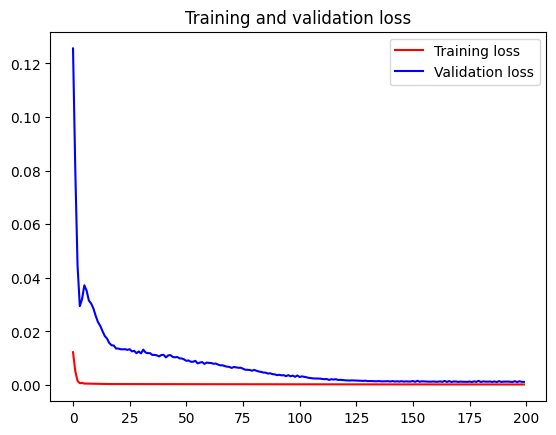

<Figure size 640x480 with 0 Axes>

In [313]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [314]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 0s 4ms/step


((264, 1), (172, 1))

- # Model Evaluation

In [315]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

- ## Evaluation metrices RMSE, MSE and MAE

In [316]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  737.5712230452509
Train data MSE:  544011.3090644673
Train data MAE:  520.0711336903408
-------------------------------------------------------------------------------------
Test data RMSE:  1911.8360137183845
Test data MSE:  3655116.943350603
Test data MAE:  1344.3385720218025


- ## Variance Regression Score

In [317]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9188616159505907
Test data explained variance regression score: 0.9790770915908898


- ## R square score for regression

In [318]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9188074870769789
Test data R2 score: 0.9754394793153545


- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [319]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0008283484632353985
Test data MGD:  0.0013283326810639487
----------------------------------------------------------------------
Train data MPD:  21.105430957828254
Test data MPD:  67.83427171174341


- # Comparision of original stock close price and predicted close price

In [320]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (468, 1)
Test predicted data:  (468, 1)


- # Predicting next 30 days

In [321]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


- # Plotting last 15 days of dataset and next predicted 30 days

In [322]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [323]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [324]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##XGBoot

In [325]:
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

from datetime import datetime

In [363]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (264, 15)
y_train:  (264,)
X_test:  (172, 15)
y_test (172,)


In [364]:
reg = xgb.XGBRegressor()

In [348]:
## Hyper Parameter Optimization Grid

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
 "max_depth"        : [1, 3, 4, 5, 6, 7],
 "n_estimators"     : [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
 "min_child_weight" : [int(x) for x in np.arange(3, 15, 1)],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "subsample"        : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bytree" : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bylevel": [0.5, 0.6, 0.7, 0.8, 0.9, 1],

}

In [349]:
model  = RandomizedSearchCV(
                reg,
                param_distributions=params,
                n_iter=10,
                n_jobs=-1,
                cv=5,
                verbose=3,
)

In [351]:
model

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                                              0.8, 0.9, 1],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                  0.6, 0.7, 0.8, 0.9, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [1, 3, 4, 5, 6, 7],
                                        'min_child_weight': [3, 4, 5, 6, 7, 8,
                                                             9, 10, 11, 12, 13,
                                                             14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000],
                                        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9, 1]},
                   verbose=3)

In [365]:
print(X_train.shape, y_train.shape)

(264, 15) (264,)


In [366]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                                              0.8, 0.9, 1],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                  0.6, 0.7, 0.8, 0.9, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [1, 3, 4, 5, 6, 7],
                                        'min_child_weight': [3, 4, 5, 6, 7, 8,
                                                             9, 10, 11, 12, 13,
                                                             14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000],
                                        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9, 1]},
                   verbose=3)

In [372]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Создание модели
reg = xgb.XGBRegressor()

# Определение сетки гиперпараметров
params = {
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth": [1, 3, 4, 5, 6, 7],
    "n_estimators": [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
    "min_child_weight": [int(x) for x in np.arange(3, 15, 1)],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "subsample": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "colsample_bylevel": [0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

# Использование RandomizedSearchCV для оптимизации гиперпараметров
model = RandomizedSearchCV(
    reg,
    param_distributions=params,
    n_iter=10,
    n_jobs=-1,
    cv=5,
    verbose=3
)

# Обучение модели
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                                              0.8, 0.9, 1],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                  0.6, 0.7, 0.8, 0.9, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [1, 3, 4, 5, 6, 7],
                                        'min_child_weight': [3, 4, 5, 6, 7, 8,
                                                             9, 10, 11, 12, 13,
                                                             14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000],
                                        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9, 1]},
                   verbose=3)

In [373]:
# Обучение модели с оптимальными гиперпараметрами
best_model = model.best_estimator_
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=None, colsample_bytree=0.7,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.15, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
             max_leaves=None, min_child_weight=13, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=733,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [374]:
print(f"Model Best Score : {model.best_score_}")
print(f"Model Best Parameters : {model.best_estimator_.get_params()}")

Model Best Score : -9.77895692559263
Model Best Parameters : {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': 0.7, 'colsample_bynode': None, 'colsample_bytree': 0.7, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.15, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 1, 'max_leaves': None, 'min_child_weight': 13, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 733, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.7, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [384]:
# Использование обученной модели для предсказания на тестовых данных
y_pred = best_model.predict(X_test)

y_pred

array([0.20188953, 0.20188953, 0.20188953, 0.20188953, 0.20188953,
       0.20188953, 0.20188953, 0.20188953, 0.20188953, 0.20188953,
       0.20188953, 0.20188953, 0.20188953, 0.20188953, 0.20188953,
       0.20188953, 0.20188953, 0.20188953, 0.20188953, 0.20188953,
       0.20188953, 0.20188953, 0.20188953, 0.20188953, 0.20188953,
       0.20188953, 0.20188953, 0.20188953, 0.20188953, 0.20188953,
       0.20188953, 0.20188953, 0.20188953, 0.20188953, 0.20188953,
       0.20188953, 0.20188953, 0.20188953, 0.20188953, 0.20188953,
       0.20188953, 0.20188953, 0.20188953, 0.20188953, 0.20188953,
       0.20188953, 0.20188953, 0.20188953, 0.20188953, 0.20188953,
       0.20188953, 0.20188953, 0.20188953, 0.20188953, 0.20188953,
       0.20188953, 0.20188953, 0.20188953, 0.20188953, 0.20188953,
       0.20188953, 0.20188953, 0.20188953, 0.20188953, 0.20188953,
       0.20188953, 0.20188953, 0.20188953, 0.20188953, 0.20188953,
       0.20188953, 0.20188953, 0.20188953, 0.20188953, 0.20188

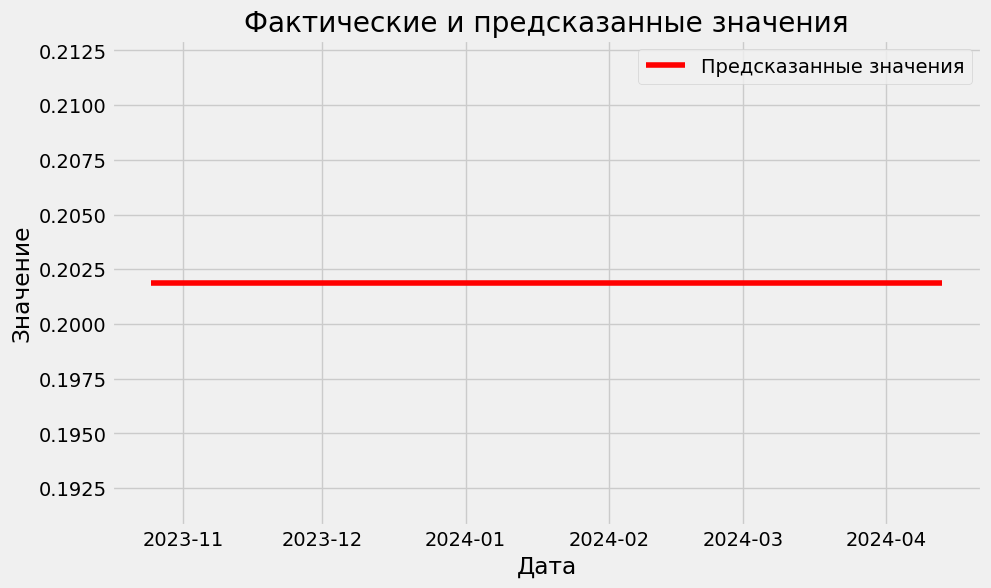

In [383]:
import matplotlib.pyplot as plt

# Создание графика
plt.figure(figsize=(10, 6))

# Визуализация фактических значений
#plt.plot(df_valid.index, y_test, label='Фактические значения', color='b')

# Визуализация предсказанных значений
plt.plot(df_valid.index[-172:], y_pred, label='Предсказанные значения', color='r')

# Настройка графика
plt.title('Фактические и предсказанные значения')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()